In [188]:
%matplotlib inline
import nibabel as nib
from nibabel.processing import resample_to_output
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import re

from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report

seed = 42
np.random.seed(seed)  # for reproducibility

In [9]:
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda0,floatX=float32"
os.environ["KERAS_BACKEND"] = "theano"
import theano
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution3D, MaxPooling3D
from keras.utils import np_utils

In [41]:
# zero-pad some of the entries so they match the filenames
df = pd.read_csv('C:/Users/Leo/Documents/GradSchool/2018_IA_Hackathon/data/phenotype/phenotype_t1.csv',
                converters={'ID': lambda x: str(x).zfill(4)})
# make the ID the index in the pandas dataframe
df.set_index('ID', inplace=True)
df.head()

,Gc,Gv,Gl,Gs
ID,,,,
1105,1.023653,0.991524,0.462879,0.511900
1125,-0.223765,-1.001832,-1.862046,-0.327059
1130,-1.127033,-1.870645,-0.899005,-2.209004
1362,-0.063546,0.850259,0.470841,0.756666
1381,0.450993,0.810722,0.667942,0.606078


In [112]:
data = list()
i=1
labels = []
pheno = []
lesion_masks = glob('C:/Users/Leo/Documents/GradSchool/2018_IA_Hackathon/data/Hackathon_Lesion_Data/LESYMAP_trainingSet/*.nii.gz')
for les_file in lesion_masks:
    match = re.match(r'.*\\([0-9]{4}).nii.gz', les_file)
    sub_id = match.groups()[0]
    if sub_id in df.index:   
        pheno.append(df.loc[sub_id]['Gc'])
        labels.append(sub_id)
        les_img = nib.load(les_file)
        les_img_resamp = resample_to_output(les_img, voxel_sizes=(3, 3, 3))
        les_data = les_img_resamp.get_data()
        data.append(les_data)


In [117]:
data_array = np.array(data, dtype="float")
labels_array = np.array(labels, dtype="float")

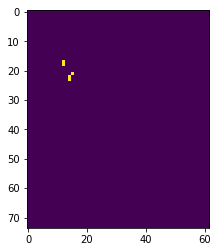

In [133]:
plt.imshow(data_array[0,20,:,:])

In [172]:
# Normalize the labels
Y = pheno / np.linalg.norm(pheno)

# Format
X = data_array.reshape(data_array.shape[0], 1, *data_array.shape[1:4])
input_shape = X[0].shape

#(trainX, testX, trainY, testY) = train_test_split(data_array, pheno_normalized, test_size=0.1, random_state=seed)

#trainX = trainX.reshape(trainX.shape[0], 1, *trainX.shape[1:4])
#testX = testX.reshape(testX.shape[0], 1, *testX.shape[1:4])

#input_shape = trainX[0].shape

In [155]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv3D, MaxPooling3D
from keras.models import Sequential
import matplotlib.pylab as plt
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping

In [140]:
model = Sequential()
 
model.add(Convolution3D(32, (5,5,5), activation='relu', input_shape=input_shape, data_format = 'channels_first'))
model.add(Convolution3D(32, (5,5,5), activation='relu', input_shape=input_shape, data_format = 'channels_first'))
model.add(MaxPooling3D(pool_size=(2,2,2)))
model.add(Convolution3D(64, (2,2,2), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling3D(pool_size=(2,2,2)))
model.add(Convolution3D(64, (2,2,2), activation='relu'))
model.add(MaxPooling3D(pool_size=(2,2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='tanh'))

In [146]:
EPOCHS = 20
BATCH = 25
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])
early_stopper = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')

In [147]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), 
          batch_size=BATCH, nb_epoch=10, verbose=1, callbacks=[early_stopper])

C:\Users\Leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 72 samples, validate on 9 samples
Epoch 1/10
72/72 [==============================] - 21s 296ms/step - loss: 0.0134 - mean_absolute_error: 0.0896 - val_loss: 0.0106 - val_mean_absolute_error: 0.0927
Epoch 2/10
72/72 [==============================] - 4s 59ms/step - loss: 0.0089 - mean_absolute_error: 0.0757 - val_loss: 0.0090 - val_mean_absolute_error: 0.0813
Epoch 3/10
72/72 [==============================] - 4s 59ms/step - loss: 0.0070 - mean_absolute_error: 0.0674 - val_loss: 0.0100 - val_mean_absolute_error: 0.0871
Epoch 4/10
72/72 [==============================] - 4s 60ms/step - loss: 0.0059 - mean_absolute_error: 0.0635 - val_loss: 0.0094 - val_mean_absolute_error: 0.0807
Epoch 5/10
72/72 [==============================] - 4s 59ms/step - loss: 0.0053 - mean_absolute_error: 0.0582 - val_loss: 0.0109 - val_mean_absolute_error: 0.1004
Epoch 6/10
72/72 [==============================] - 4s 59ms/step - loss: 0.0054 - mean_absolute_error: 0.0599 - val_loss: 0.0082 - val_mean_

In [182]:
X[0:20].shape


(20, 1, 62, 74, 62)

In [185]:
kfold.split(range(0,20), )

TypeError: Singleton array array(1) cannot be considered a valid collection.

In [187]:
kfold

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
# training param
EPOCHS = 20
BATCH = 25
early_stopper = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(range(X.shape[0])):
    # create model
    model = Sequential()
    model.add(Convolution3D(32, (5,5,5), activation='relu', input_shape=input_shape, data_format = 'channels_first'))
    model.add(Convolution3D(32, (5,5,5), activation='relu', input_shape=input_shape, data_format = 'channels_first'))
    model.add(MaxPooling3D(pool_size=(2,2,2)))
    model.add(Convolution3D(64, (2,2,2), activation='relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling3D(pool_size=(2,2,2)))
    model.add(Convolution3D(64, (2,2,2), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2,2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='tanh'))# Compile model
    
    model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])
    
    # Fit the model
    model.fit(X[train], Y[train], batch_size=BATCH,
              nb_epoch=EPOCHS, verbose=1, callbacks=[early_stopper])
    # evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

C:\Users\Leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/20
72/72 [==============================] - 6s 81ms/step - loss: 0.0713 - mean_absolute_error: 0.1795
Epoch 2/20


C:\Users\Leo\Anaconda3\lib\site-packages\keras\callbacks.py:535: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


72/72 [==============================] - 4s 56ms/step - loss: 0.0127 - mean_absolute_error: 0.0915
Epoch 3/20
72/72 [==============================] - 4s 56ms/step - loss: 0.0125 - mean_absolute_error: 0.0902
Epoch 4/20
72/72 [==============================] - 4s 56ms/step - loss: 0.0116 - mean_absolute_error: 0.0864
Epoch 5/20
72/72 [==============================] - 4s 56ms/step - loss: 0.0088 - mean_absolute_error: 0.0741
Epoch 6/20
72/72 [==============================] - 4s 56ms/step - loss: 0.0078 - mean_absolute_error: 0.0714
Epoch 7/20
72/72 [==============================] - 4s 56ms/step - loss: 0.0080 - mean_absolute_error: 0.0710
Epoch 8/20
72/72 [==============================] - 4s 56ms/step - loss: 0.0066 - mean_absolute_error: 0.0660
Epoch 9/20
72/72 [==============================] - 4s 57ms/step - loss: 0.0062 - mean_absolute_error: 0.0618
Epoch 10/20
72/72 [==============================] - 4s 56ms/step - loss: 0.0049 - mean_absolute_error: 0.0548
Epoch 11/20
72/72 [=

73/73 [==============================] - 5s 68ms/step - loss: 0.0033 - mean_absolute_error: 0.0444
Epoch 16/20
73/73 [==============================] - 6s 78ms/step - loss: 0.0027 - mean_absolute_error: 0.0415
Epoch 17/20
73/73 [==============================] - 6s 86ms/step - loss: 0.0028 - mean_absolute_error: 0.0408
Epoch 18/20
73/73 [==============================] - 6s 76ms/step - loss: 0.0025 - mean_absolute_error: 0.0377
Epoch 19/20
73/73 [==============================] - 6s 81ms/step - loss: 0.0024 - mean_absolute_error: 0.0385
Epoch 20/20
73/73 [==============================] - 6s 88ms/step - loss: 0.0021 - mean_absolute_error: 0.0344
mean_absolute_error: 9.02%
Epoch 1/20
73/73 [==============================] - 7s 96ms/step - loss: 0.0625 - mean_absolute_error: 0.1834
Epoch 2/20
73/73 [==============================] - 7s 89ms/step - loss: 0.0122 - mean_absolute_error: 0.0886
Epoch 3/20
73/73 [==============================] - 6s 87ms/step - loss: 0.0121 - mean_absolute_err

In [175]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


<generator object _BaseKFold.split at 0x000001CC01D17150>